# Trabajo Práctico Datos (75.06) - Análisis exploratorio de datos


El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los requisitos de la primera entrega son los siguientes:

- El análisis debe estar hecho en R o Python Pandas.
- El análisis debe entregarse en formato papel en una carpeta en donde se incluya el reporte completo y todas las visualizaciones generadas. Es altamente recomendable que las visualizaciones se impriman en color.
- Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.
- Agregar en Kaggle un kernel con el análisis exploratorio realizado.

La evaluación del TP se realizará en base al siguiente criterio:

- Originalidad del análisis exploratorio. 
- Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
- Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
- Calidad de las visualizaciones presentadas.
- ¿Tienen todos los ejes su rótulo?
- ¿Tiene cada visualización un título?
- ¿Es entendible la visualización sin tener que leer la explicación?
- ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
- ¿Es una visualización interesante?
- ¿El uso del color es adecuado?
- ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
- ¿La visualización es consistente con los datos?
- Conclusiones presentadas.
- ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante? ¿Descubrieron cosas que pueden ser de interés las personas que estén pensando en realizar alguna operación inmobiliaria, o a empresa Properati?


In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

import calendar

### Carga de archivos:

In [3]:
#Carga de datos 2017
filenames_2017 = ['properties/properati-AR-2017-01-01-properties-sell.csv',
                 'properties/properati-AR-2017-02-01-properties-sell.csv',
                 'properties/properati-AR-2017-03-01-properties-sell.csv',
                 'properties/properati-AR-2017-04-01-properties-sell.csv',
                 'properties/properati-AR-2017-05-01-properties-sell.csv',
                 'properties/properati-AR-2017-06-01-properties-sell.csv',
                 'properties/properati-AR-2017-07-01-properties-sell.csv']

dataframes_2017 = []
for filename in filenames_2017:
    dataframes_2017.append(pd.read_csv(filename))
    
data_2017 = pd.DataFrame()
for dataframe in dataframes_2017:
    data_2017 = pd.concat([data_2017, dataframe]).drop_duplicates().reset_index(drop=True)
    
#Carga de datos 2016
filenames_2016 = ['properties/properati-AR-2016-01-01-properties-sell.csv', 
            'properties/properati-AR-2016-02-01-properties-sell.csv',
            'properties/properati-AR-2016-03-01-properties-sell.csv',
            'properties/properati-AR-2016-04-01-properties-sell.csv',
            'properties/properati-AR-2016-05-01-properties-sell.csv',
            'properties/properati-AR-2016-06-01-properties-sell.csv',
            'properties/properati-AR-2016-07-01-properties-sell.csv',
            'properties/properati-AR-2016-08-01-properties-sell.csv',
            'properties/properati-AR-2016-09-01-properties-sell.csv',
            'properties/properati-AR-2016-10-01-properties-sell.csv',
            'properties/properati-AR-2016-11-01-properties-sell.csv',
            'properties/properati-AR-2016-12-01-properties-sell.csv']

dataframes_2016 = []
for filename in filenames_2016:
    dataframes_2016.append(pd.read_csv(filename))

data_2016 = pd.DataFrame()
for dataframe in dataframes_2016:
    data_2016 = pd.concat([data_2016, dataframe]).drop_duplicates().reset_index(drop=True)

#Primer y segundo semestre de 2016
psem_2016 = pd.DataFrame()
for x in range(0,6):
    psem_2016 = pd.concat([psem_2016, dataframes_2016[x]]).drop_duplicates().reset_index(drop=True)
    
ssem_2016 = pd.DataFrame()
for x in range(6,12):
    ssem_2016 = pd.concat([ssem_2016, dataframes_2016[x]]).drop_duplicates().reset_index(drop=True)
    
#Primer y Segundo Semestre de 2015
psem_2015 = pd.read_csv('properties/properati-AR-2015-06-01-properties-sell-six_months.csv')
ssem_2015 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell-six_months.csv')
#Primer y Segundo Semestre de 2014
psem_2014 = pd.read_csv('properties/properati-AR-2014-07-01-properties-sell.csv')
ssem_2014 = pd.read_csv('properties/properati-AR-2015-01-01-properties-sell-six_months.csv')

dataset = pd.concat([data_2017, data_2016, psem_2015, ssem_2015, psem_2014, ssem_2014]).drop_duplicates('properati_url').reset_index(drop=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415445 entries, 0 to 415444
Data columns (total 28 columns):
country_name                  363784 non-null object
created_on                    415445 non-null object
currency                      348246 non-null object
description                   363766 non-null object
expenses                      37066 non-null float64
floor                         49106 non-null float64
geonames_id                   354368 non-null float64
id                            363784 non-null object
image_thumbnail               406679 non-null object
lat                           305925 non-null float64
lat-lon                       305925 non-null object
lon                           305925 non-null float64
operation                     415445 non-null object
place_name                    415394 non-null object
place_with_parent_names       415445 non-null object
price                         365117 non-null float64
price_aprox_local_currency    365115 

## Análisis de 2016 y 2017.
O los combinamos o van uno atrás del otro


# Analisis de precio en USD en funcion del barrio

# Top 5  de barrios con precios por propiedad en venta mas caros del segundo semestre del 2014 hasta julio del 2017 inclusive en USD en Capital Federal

In [4]:
top_barrios = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
top_barrios.dropna(inplace=True)
top_barrios = top_barrios.groupby('place_name').agg([np.mean,np.size])
top_barrios = top_barrios.loc[top_barrios[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
top_barrios.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
top_barrios

,price_aprox_usd
,mean
place_name,
Palermo Chico,977763.291313
Puerto Madero,881928.403260
Retiro,429583.406906
Recoleta,407536.719853
Belgrano,353035.344893


# Promedio de precios en USD en el 1er semestre 2014 segun top 5

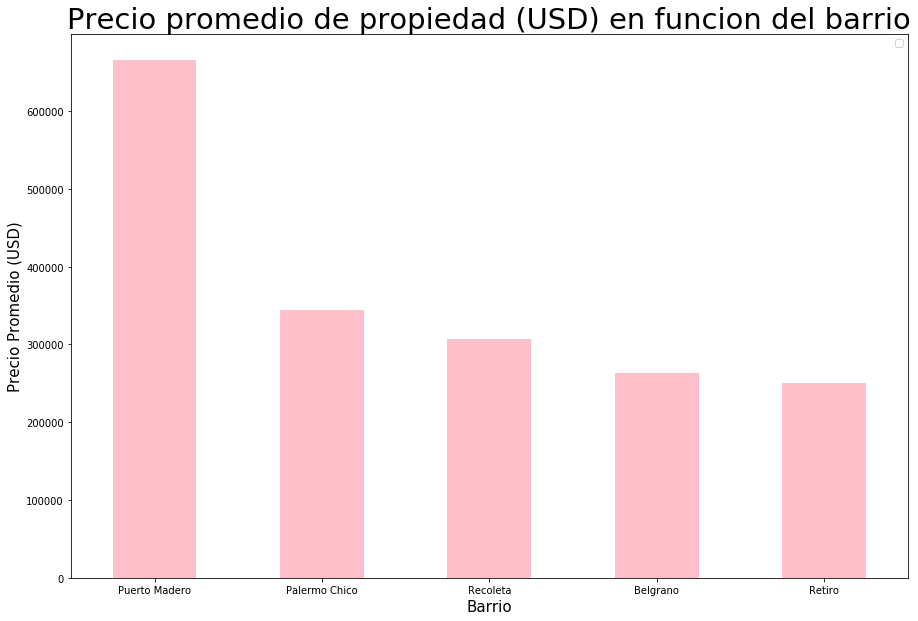

In [21]:
psem_2014_pr = psem_2014.loc[(psem_2014.place_name.str.contains('Palermo Chico') | \
                             psem_2014.place_name.str.contains('Puerto Madero') | \
                             psem_2014.place_name.str.contains('Retiro') | \
                             psem_2014.place_name.str.contains('Recoleta') | \
                             psem_2014.place_name.str.contains('Belgrano') ) \
                            & (psem_2014.price_aprox_usd > 0) \
                             & psem_2014.place_with_parent_names.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2014_pr.dropna(inplace=True)
psem_2014_pr = psem_2014_pr.groupby('place_name').agg([np.mean])
psem_2014_pr = psem_2014_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2014_pr.plot(kind='bar', figsize =(15,10), color='pink', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en el 2do semestre 2014 segun top 5

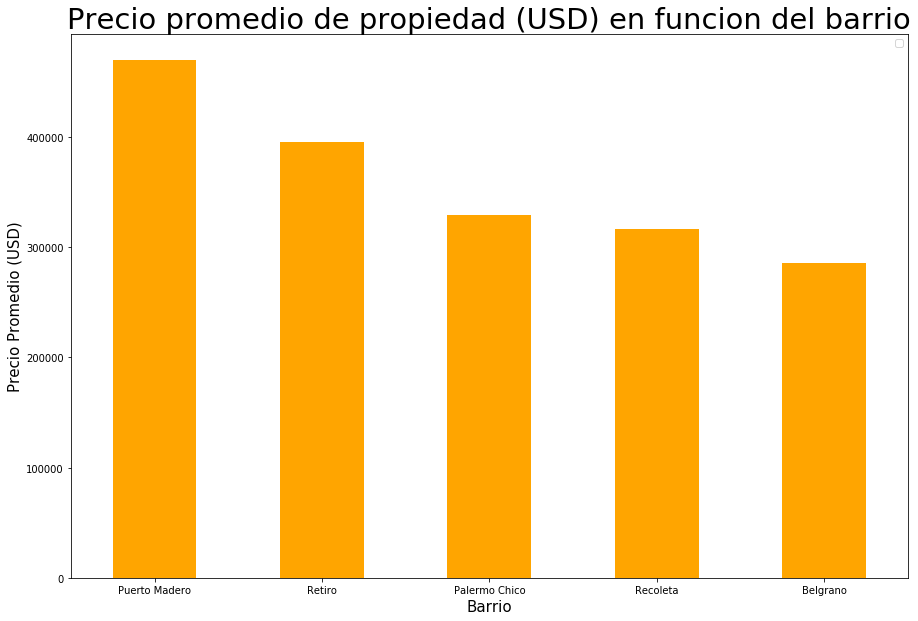

In [22]:
ssem_2014_pr = ssem_2014.loc[(ssem_2014.place_name.str.contains('Palermo Chico') | \
                             ssem_2014.place_name.str.contains('Puerto Madero') | \
                             ssem_2014.place_name.str.contains('Retiro') | \
                             ssem_2014.place_name.str.contains('Recoleta') | \
                             ssem_2014.place_name.str.contains('Belgrano') ) \
                            & (ssem_2014.price_aprox_usd > 0) & ssem_2014.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2014_pr.dropna(inplace=True)
ssem_2014_pr = ssem_2014_pr.groupby('place_name').agg([np.mean])
ssem_2014_pr = ssem_2014_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2014_pr.plot(kind='bar', figsize =(15,10), color='orange', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en el 1er semestre 2015 segun top 5

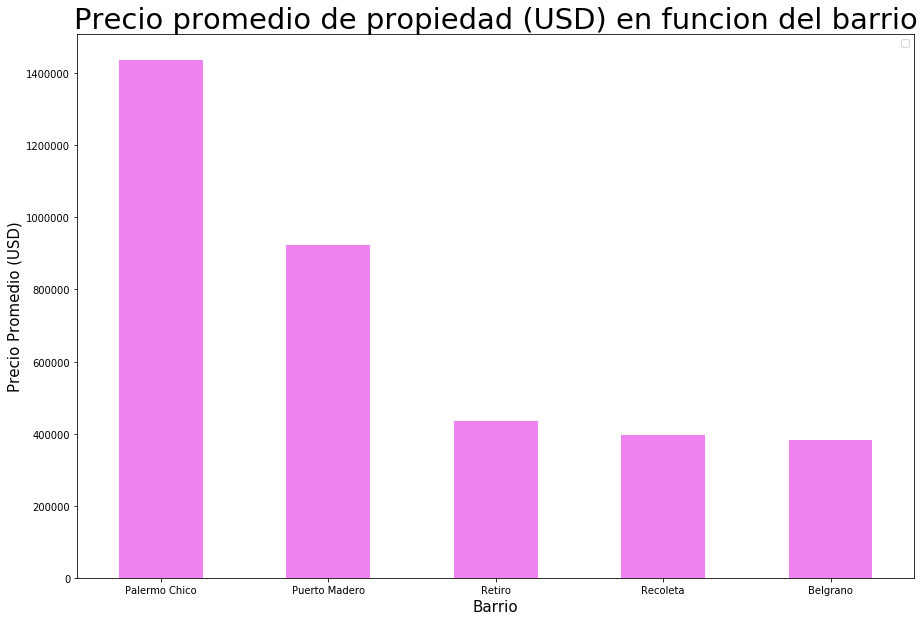

In [23]:
psem_2015_pr = psem_2015.loc[(psem_2015.place_name.str.contains('Palermo Chico') | \
                             psem_2015.place_name.str.contains('Puerto Madero') | \
                             psem_2015.place_name.str.contains('Retiro') | \
                             psem_2015.place_name.str.contains('Recoleta') | \
                             psem_2015.place_name.str.contains('Belgrano') ) \
                             & (psem_2015.price_aprox_usd > 0) & psem_2015.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2015_pr.dropna(inplace=True)
psem_2015_pr = psem_2015_pr.groupby('place_name').agg([np.mean])
psem_2015_pr = psem_2015_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2015_pr.plot(kind='bar', figsize =(15,10), color='violet', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en el 2do semestre 2015 segun top 5

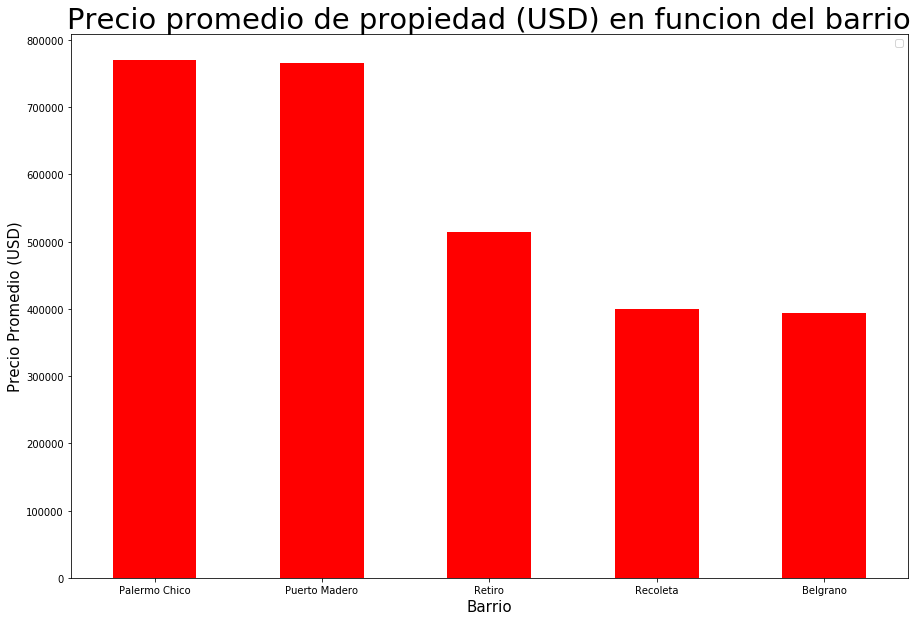

In [24]:
ssem_2015_pr = ssem_2015.loc[(ssem_2015.place_name.str.contains('Palermo Chico') | \
                             ssem_2015.place_name.str.contains('Puerto Madero') | \
                             ssem_2015.place_name.str.contains('Retiro') | \
                             ssem_2015.place_name.str.contains('Recoleta') | \
                             ssem_2015.place_name.str.contains('Belgrano') ) \
                             & (ssem_2015.price_aprox_usd > 0) & ssem_2015.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2015_pr.dropna(inplace=True)
ssem_2015_pr = ssem_2015_pr.groupby('place_name').agg([np.mean])
ssem_2015_pr = ssem_2015_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2015_pr.plot(kind='bar', figsize =(15,10), color='r', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en el 1er semestre 2016 segun top 5

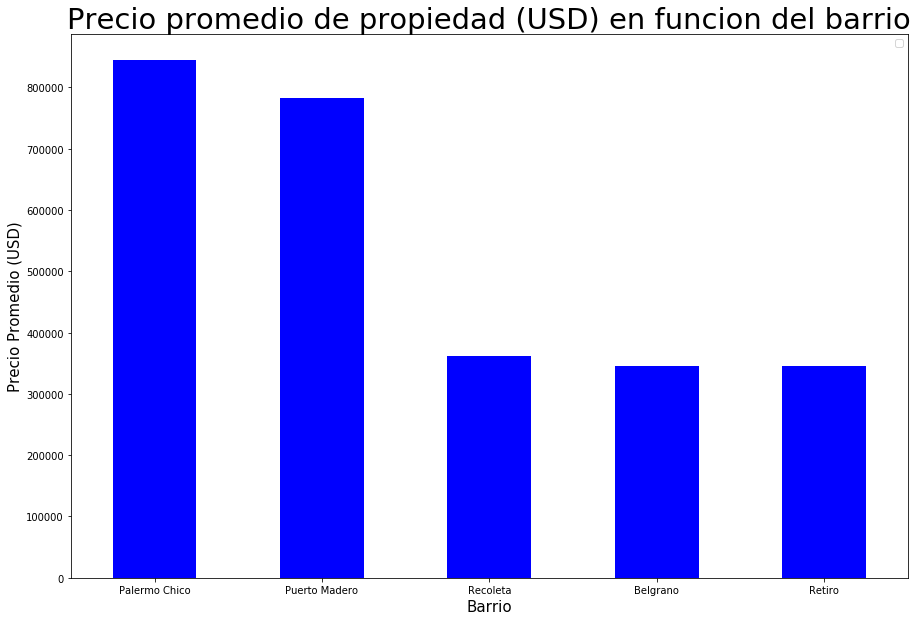

In [25]:
psem_2016_pr = psem_2016.loc[(psem_2016.place_name.str.contains('Palermo Chico') | \
                             psem_2016.place_name.str.contains('Puerto Madero') | \
                             psem_2016.place_name.str.contains('Retiro') | \
                             psem_2016.place_name.str.contains('Recoleta') | \
                             psem_2016.place_name.str.contains('Belgrano') ) \
                             & (psem_2016.price_aprox_usd > 0) & psem_2016.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2016_pr.dropna(inplace=True)
psem_2016_pr = psem_2016_pr.groupby('place_name').agg([np.mean])
psem_2016_pr = psem_2016_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2016_pr.plot(kind='bar', figsize =(15,10), color='b', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en el 2do semestre 2016 segun top 5

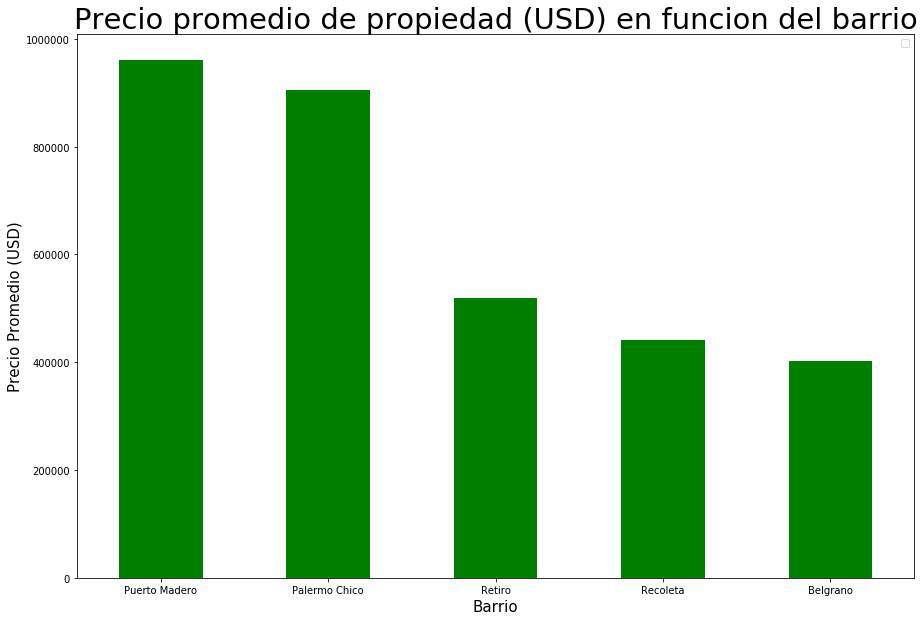

In [26]:
ssem_2016_pr = ssem_2016.loc[(ssem_2016.place_name.str.contains('Palermo Chico') | \
                             ssem_2016.place_name.str.contains('Puerto Madero') | \
                             ssem_2016.place_name.str.contains('Retiro') | \
                             ssem_2016.place_name.str.contains('Recoleta') | \
                             ssem_2016.place_name.str.contains('Belgrano') ) \
                             & (ssem_2016.price_aprox_usd > 0) & ssem_2016.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2016_pr.dropna(inplace=True)
ssem_2016_pr = ssem_2016_pr.groupby('place_name').agg([np.mean])
ssem_2016_pr = ssem_2016_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2016_pr.plot(kind='bar', figsize =(15,10), color='g', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Promedio de precios en USD en 2017 (hasta julio) segun top 5

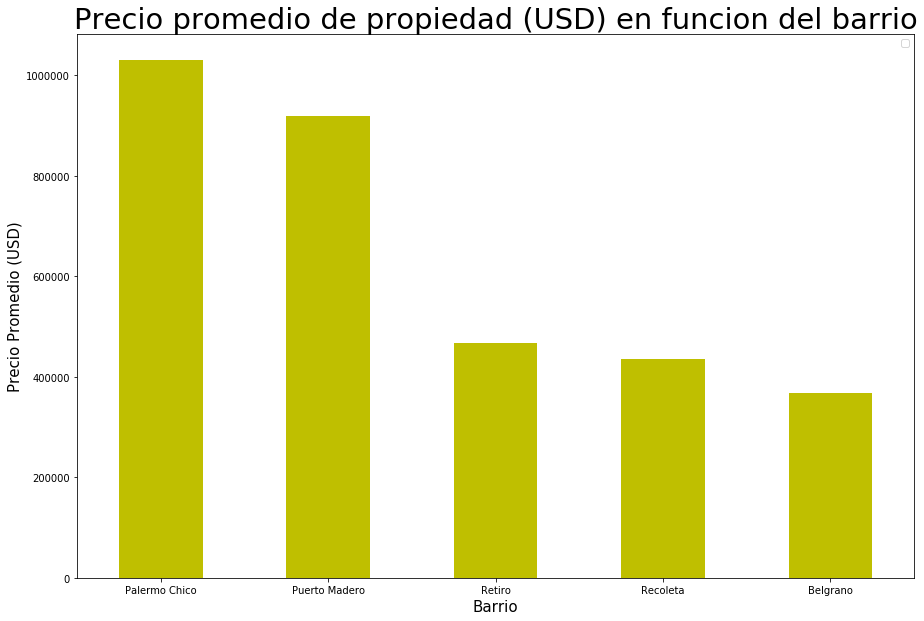

In [27]:
_2017_pr = data_2017.loc[(data_2017.place_name.str.contains('Palermo Chico') | \
                             data_2017.place_name.str.contains('Puerto Madero') | \
                             data_2017.place_name.str.contains('Retiro') | \
                             data_2017.place_name.str.contains('Recoleta') | \
                             data_2017.place_name.str.contains('Belgrano') ) \
                             & (data_2017.price_aprox_usd > 0) & data_2017.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
_2017_pr.dropna(inplace=True)
_2017_pr = _2017_pr.groupby('place_name').agg([np.mean])
_2017_pr = _2017_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = _2017_pr.plot(kind='bar', figsize =(15,10), color='y', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.legend('')

# Precio en funcion del tipo de propiedad en venta

In [29]:
tipo_prop = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.price_aprox_usd > 0),['property_type', 'price_aprox_usd']]
tipo_prop.dropna(inplace=True)
tipo_prop = tipo_prop.groupby('property_type').agg([np.mean]).sort_values(('price_aprox_usd', 'mean') \
                                                                          , ascending = False).head()
tipo_prop

,price_aprox_usd
,mean
property_type,
house,472794.134508
store,450339.057963
apartment,222938.312914
PH,175442.683105


# ¿En que barrio son mas caras las casas, desde el 2014 hasta julio del 2017?

In [30]:
casas_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.property_type.str.contains('house')) \
                   & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
casas_pr.dropna(inplace=True)
casas_pr = casas_pr.groupby('place_name').agg([np.mean,np.size])
casas_pr = casas_pr.loc[casas_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
casas_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
casas_pr

,price_aprox_usd
,mean
place_name,
Belgrano,1.088002e+06
Palermo,7.924864e+05
Villa Devoto,4.267653e+05
Caballito,4.135204e+05
Villa Urquiza,3.910817e+05


# ¿En que barrio son mas caros los departamentos, desde el 2014 hasta julio del 2017?

In [31]:
deptos_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.property_type.str.contains('apartment')) \
                   & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
deptos_pr.dropna(inplace=True)
deptos_pr = deptos_pr.groupby('place_name').agg([np.mean,np.size])
deptos_pr = deptos_pr.loc[deptos_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
deptos_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
deptos_pr

,price_aprox_usd
,mean
place_name,
Puerto Madero,878486.281202
Palermo Chico,788957.532966
Recoleta,399116.940509
Retiro,378782.596592
Belgrano,315365.003004


# ¿En que barrio son mas caros los PH, desde el 2014 hasta julio del 2017? 

In [32]:
ph_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.property_type.str.contains('PH')) \
                   & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
ph_pr.dropna(inplace=True)
ph_pr = ph_pr.groupby('place_name').agg([np.mean,np.size])
ph_pr = ph_pr.loc[ph_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
ph_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
ph_pr

,price_aprox_usd
,mean
place_name,
Palermo,266492.629474
Belgrano,242242.342342
Caballito,202328.638498
Almagro,193667.525773
Villa Crespo,188174.795350


# ¿En que barrio son mas caros los negocios, desde el 2014 hasta julio del 2017?

In [33]:
negocios_pr = dataset.loc[dataset.state_name.str.contains('Capital Federal') & (dataset.place_name.str.contains('Capital Federal') == False) \
                   & (dataset.property_type.str.contains('store')) \
                   & (dataset.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
negocios_pr.dropna(inplace=True)
negocios_pr = negocios_pr.groupby('place_name').agg([np.mean,np.size])
negocios_pr = negocios_pr.loc[negocios_pr[('price_aprox_usd', 'size')]>50,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
negocios_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
negocios_pr

,price_aprox_usd
,mean
place_name,
San Nicolás,621405.814568
San Telmo,568618.048642
Recoleta,563532.595000
Palermo,557311.293493
Balvanera,538694.138654
